Compare the results of my implementation to both `exctinction.py` and `dust_exctinction.py` to make sure that execution time is comparable to `exctinction` (the whole point of this after all), hopefully faster than `dust_extinction` but with the same result.

Links for reference:
- https://github.com/kbarbary/extinction
- https://github.com/karllark/dust_extinction

In [1]:
import extinction as exctinction_py
import dust_extinction.parameter_averages as de_param_average_py
import matplotlib.pyplot as plt
import numpy as np
from astropy import units

import numba_extinction.numba_extinction as numba_ext

In [2]:
# Defaults, SDSS + some IR spectrum
wave = np.arange(3000, 20000, 0.01) * units.AA

a_v = 1.0
r_v = 3.1

def qa_plot(wave, ref, upd):
    # make plot
    fig, ax = plt.subplots(1, 2, figsize=(10, 6 / 1.61), layout="constrained")

    ax[0].plot(wave, ref, label="Reference PKG")
    ax[0].plot(wave, upd, label="This PKG")
    ax[0].set_xlabel(r"Wavelength [$\AA$]")
    ax[0].set_ylabel(r"A$_{\lambda}$")
    ax[0].set_xscale("log")
    ax[0].set_yscale("log")

    ax[1].plot(wave, ref - upd, label="Reference PKG")
    ax[1].set_xlabel(r"Wavelength [$\AA$]")
    ax[1].set_ylabel(r"A$_{\lambda}$")
    ax[1].set_xscale("log")

    plt.show()

[Info] Maximum difference: 1.110e-15
[Info] Time taken for the original implementation:
102 ms ± 1.81 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
[Info] Time taken for the numba version:
14.3 ms ± 56.4 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


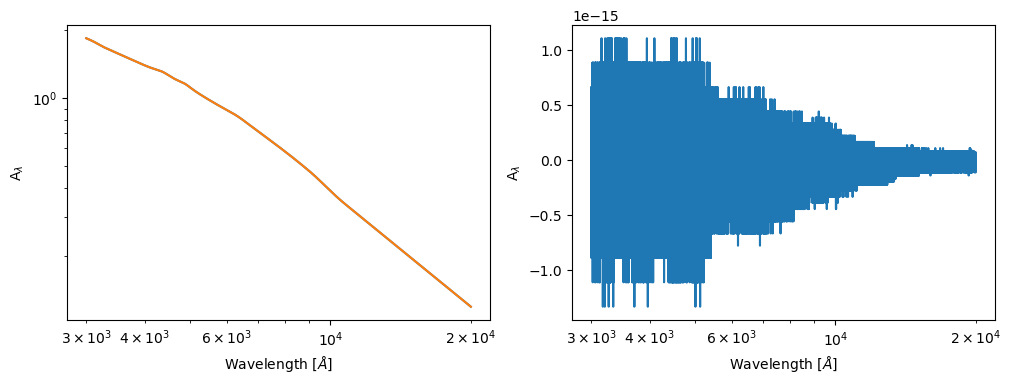

In [3]:
# Gordon 23 - dust_extinction
ref = de_param_average_py.G23(Rv=r_v)(wave) * a_v  # Needed to match my implementation
upd = numba_ext.Go23(wave, a_v, r_v)

print(f"[Info] Maximum difference: {np.max(ref - upd):.3e}")
print(f"[Info] Time taken for the original implementation:")
%timeit de_param_average_py.G23(Rv=r_v)(wave) * a_v
print(f"[Info] Time taken for the numba version:")
%timeit numba_ext.Go23(wave, a_v, r_v)

qa_plot(wave, ref, upd)